In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
val_feats = np.load("/home/santiago.cuervo/data/fairseqProcessed/LibriSpeech-no-silence/valid.npy")

In [3]:
with open("/home/santiago.cuervo/data/fairseqProcessed/LibriSpeech-no-silence/valid.tsv", "r") as f:
    lines = f.readlines()
audio_path = lines[0]
audio_ids = []
for audio_id in lines[1:]:
    audio_ids.append(audio_id.split('\t')[0].split('/')[1])
    
with open("/home/santiago.cuervo/data/fairseqProcessed/LibriSpeech-no-silence/valid.phn", "r") as f:
    phone_transcripts = f.readlines()
    
with open("/home/santiago.cuervo/data/fairseqProcessed/LibriSpeech-no-silence/valid.lengths", "r") as f:
    seq_lens = f.readlines()
seq_lens = [int(l) for l in seq_lens]

In [4]:
dataset = np.split(val_feats, np.cumsum(seq_lens)[:-1])

In [5]:
len(audio_ids), len(phone_transcripts), len(seq_lens), len(dataset)

(2864, 2864, 2864, 2864)

Text(0.5, 1.0, 'Wav2vec representations for sample 3660-172183-0002.wav')

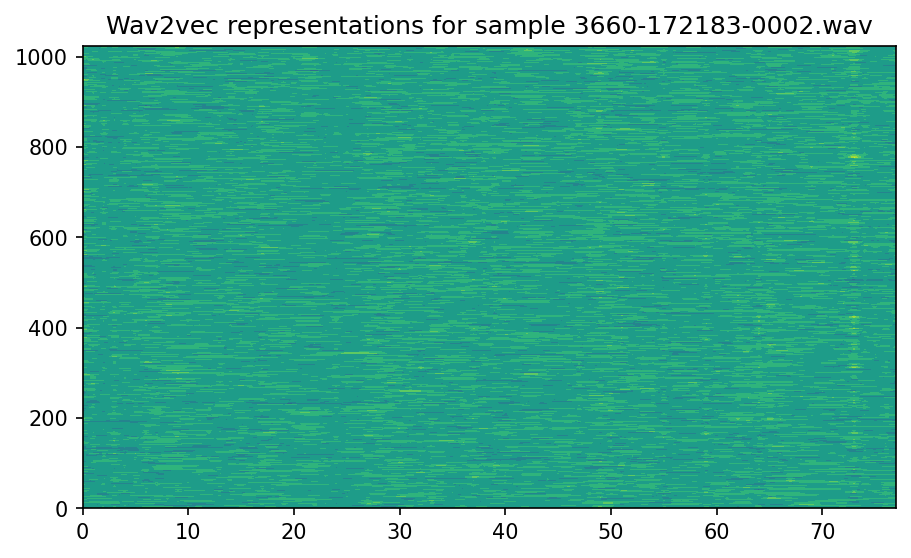

In [6]:
sample_idx = 11
x = np.arange(0, seq_lens[sample_idx])
y = np.arange(0, val_feats.shape[1])
X, Y = np.meshgrid(x, y)
Z = dataset[sample_idx].T
Z = Z / np.sqrt((Z**2).sum(1, keepdims=True))

plt.figure(figsize=(7, 4), dpi=150)
plt.contourf(X, Y, Z, 10)
plt.title(f"Wav2vec representations for sample {audio_ids[sample_idx]}")

In [7]:
from models.testbench import Wav2vec_U

In [8]:
import fairseq

cp = '/home/santiago.cuervo/ssl/mywav2vec/multirun/2023-01-15/10-22-32/0/checkpoint_best.pt'

model, cfg, task = fairseq.checkpoint_utils.load_model_ensemble_and_task([cp])
model = model[0]
model.eval()

Wav2vec_U(
  (discriminator): Discriminator(
    (net): Sequential(
      (0): Conv1d(43, 384, kernel_size=(8,), stride=(1,), padding=(7,))
      (1): SamePad()
      (2): Dropout(p=0.0, inplace=False)
      (3): Sequential(
        (0): Conv1d(384, 384, kernel_size=(8,), stride=(1,), padding=(7,))
        (1): SamePad()
        (2): Dropout(p=0.0, inplace=False)
        (3): GELU(approximate='none')
      )
      (4): Conv1d(384, 1, kernel_size=(8,), stride=(1,), padding=(7,))
      (5): SamePad()
    )
  )
  (segmenter): JoinSegmenter()
  (generator): Generator(
    (dropout): Dropout(p=0.1, inplace=False)
    (boundary_predictor): BoundaryPredictor(
      (proj): TransformerEncoder(
        (pos_conv): Sequential(
          (0): Conv1d(1024, 1024, kernel_size=(128,), stride=(1,), padding=(64,), groups=16)
          (1): SamePad()
          (2): GELU(approximate='none')
        )
        (layers): ModuleList(
          (0): TransformerSentenceEncoderLayer(
            (self_attn): Mu

In [9]:
model.generator.boundary_predictor

BoundaryPredictor(
  (proj): TransformerEncoder(
    (pos_conv): Sequential(
      (0): Conv1d(1024, 1024, kernel_size=(128,), stride=(1,), padding=(64,), groups=16)
      (1): SamePad()
      (2): GELU(approximate='none')
    )
    (layers): ModuleList(
      (0): TransformerSentenceEncoderLayer(
        (self_attn): MultiheadAttention(
          (dropout_module): FairseqDropout()
          (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
          (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
          (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
          (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
        )
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
        (dropout3): Dropout(p=0.1, inplace=False)
        (self_attn_layer_norm): FusedLayerNorm(torch.Size([1024]), eps=1e-05, elementwise_affine=True)
        (fc1): Linear(in_features=1024, out_featur